### Étape 1. Acquisition des données

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Import the CSV file:


# time series

In [42]:
#interpreter l index comme un vrai date
df =pd.read_csv('patients-maroc.csv',index_col='confirmed_date',parse_dates=True)
df

,n,sex,age,country,province,disease,group,exposure_start,exposure_end,infection_reason,infection_order,infected_by,contact_number,released_date,deceased_date,state
confirmed_date,,,,,,,,,,,,,,,,
2020-03-02,0,male,39.0,Maroc,Casablanca - Settat,NaN,NaN,NaN,NaN,Imported,NaN,NaN,NaN,3/17/20,NaN,Exit
2020-03-05,1,female,89.0,Maroc,Casablanca - Settat,1.0,NaN,NaN,NaN,Imported,NaN,NaN,NaN,NaN,3/10/20,Deceased
2020-03-10,2,male,59.0,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/29/20,NaN,Exit
2020-03-11,3,female,NaN,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/29/20,NaN,Exit
2020-03-11,4,female,1.0,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/29/20,NaN,Exit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,1179,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,NaN,Local,NaN,NaN,NaN,NaN,NaN,isolated
2020-04-07,1180,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,NaN,Local,NaN,NaN,NaN,NaN,NaN,isolated
2020-04-07,1181,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,NaN,Local,NaN,NaN,NaN,NaN,NaN,isolated


# Some basic analysis¶


In [43]:
print('nombre totale des patients:',len(df))
print('nombre totale de variables:',len(df.columns))

nombre totale des patients: 1184
nombre totale de variables: 16


In [44]:
df.isnull().any()

n                   False
sex                  True
age                  True
country              True
province            False
disease              True
group                True
exposure_start       True
exposure_end         True
infection_reason     True
infection_order      True
infected_by          True
contact_number       True
released_date        True
deceased_date        True
state               False
dtype: bool

In [45]:
df.isnull().values.any()

True

In [46]:
df.describe(include='all')

,n,sex,age,country,province,disease,group,exposure_start,exposure_end,infection_reason,infection_order,infected_by,contact_number,released_date,deceased_date,state
count,1184.000000,64,39.000000,10,1184,10.0,0.0,12,15,1025,1.0,0.0,0.0,6,11,1184
unique,NaN,2,NaN,2,11,NaN,NaN,3,1,4,NaN,NaN,NaN,4,8,3
top,NaN,female,NaN,Maroc,Casablanca - Settat,NaN,NaN,02/24 to 03/12,03/10/2020,Local,NaN,NaN,NaN,3/29/20,3/27/20,isolated
freq,NaN,34,NaN,6,353,NaN,NaN,8,15,976,NaN,NaN,NaN,3,3,1164
mean,591.415541,NaN,60.641026,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
std,341.988432,NaN,16.512335,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
25%,295.750000,NaN,56.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
50%,591.500000,NaN,65.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
75%,887.250000,NaN,71.500000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1184 entries, 2020-03-02 to 2020-04-07
Data columns (total 16 columns):
n                   1184 non-null int64
sex                 64 non-null object
age                 39 non-null float64
country             10 non-null object
province            1184 non-null object
disease             10 non-null float64
group               0 non-null float64
exposure_start      12 non-null object
exposure_end        15 non-null object
infection_reason    1025 non-null object
infection_order     1 non-null float64
infected_by         0 non-null float64
contact_number      0 non-null float64
released_date       6 non-null object
deceased_date       11 non-null object
state               1184 non-null object
dtypes: float64(6), int64(1), object(9)
memory usage: 157.2+ KB


In [48]:
df['age'].value_counts()

75.0    6
65.0    4
67.0    3
72.0    2
56.0    2
64.0    2
68.0    2
35.0    2
39.0    2
40.0    1
51.0    1
69.0    1
57.0    1
62.0    1
58.0    1
66.0    1
45.0    1
38.0    1
80.0    1
89.0    1
1.0     1
59.0    1
71.0    1
Name: age, dtype: int64

In [49]:
df['age'].mean()

60.64102564102564

In [50]:
df.groupby(['deceased_date']).mean()

,n,age,disease,group,infection_order,infected_by,contact_number
deceased_date,,,,,,,
3/10/20,1.0,89.0,1.0,NaN,NaN,NaN,NaN
3/17/20,7.0,75.0,1.0,NaN,NaN,NaN,NaN
3/20/20,54.0,39.0,1.0,NaN,NaN,NaN,NaN
3/22/20,27.0,NaN,1.0,NaN,NaN,NaN,NaN
3/26/20,128.5,NaN,1.0,NaN,NaN,NaN,NaN
3/27/20,193.0,35.0,1.0,NaN,NaN,NaN,NaN
3/28/20,126.0,NaN,1.0,NaN,NaN,NaN,NaN
4/2/20,40.0,68.0,NaN,NaN,NaN,NaN,NaN


In [51]:
df.groupby(['confirmed_date']).mean()

,n,age,disease,group,infection_order,infected_by,contact_number
confirmed_date,,,,,,,
2020-03-02,0.000000,39.000000,NaN,NaN,NaN,NaN,NaN
2020-03-05,1.000000,89.000000,1.0,NaN,NaN,NaN,NaN
2020-03-10,2.000000,59.000000,NaN,NaN,NaN,NaN,NaN
2020-03-11,3.500000,1.000000,NaN,NaN,NaN,NaN,NaN
2020-03-13,5.500000,64.000000,NaN,NaN,NaN,NaN,NaN
2020-03-14,11.500000,77.500000,1.0,NaN,NaN,NaN,NaN
2020-03-15,22.500000,NaN,1.0,NaN,NaN,NaN,NaN
2020-03-16,33.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,41.000000,68.000000,NaN,NaN,NaN,NaN,NaN


### 1.traitement des valeurs manquentes

##### les colonnes qui sont totalament vides:'group','infected_by','contact_number' ainsi les dates de deces et de liberation des aprtients 
#####  les colonnes presque vides :'country'=10 ,'exposure_start'=12,'exposure_end '=15,'infection_order'=1,'released_date'=6,'deceased_date'=11 ,disease =10 ,sex =64 ,age =39

In [52]:
df1=df

In [53]:
df1=df1.drop(['group','infected_by','contact_number','infection_order','n','deceased_date','released_date'],axis=1)
df1

,sex,age,country,province,disease,exposure_start,exposure_end,infection_reason,state
confirmed_date,,,,,,,,,
2020-03-02,male,39.0,Maroc,Casablanca - Settat,NaN,NaN,NaN,Imported,Exit
2020-03-05,female,89.0,Maroc,Casablanca - Settat,1.0,NaN,NaN,Imported,Deceased
2020-03-10,male,59.0,France,Marrakech - Safi,NaN,3/7/20,NaN,Imported,Exit
2020-03-11,female,NaN,France,Marrakech - Safi,NaN,3/7/20,NaN,Imported,Exit
2020-03-11,female,1.0,France,Marrakech - Safi,NaN,3/7/20,NaN,Imported,Exit
...,...,...,...,...,...,...,...,...,...
2020-04-07,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,Local,isolated
2020-04-07,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,Local,isolated
2020-04-07,NaN,NaN,NaN,Daraa - Tafilalet,NaN,NaN,NaN,Local,isolated


# IMPUTATIN POUR LES MISSING DATA

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [55]:
df1['country'].value_counts()

Maroc     6
France    4
Name: country, dtype: int64

In [56]:
df1['exposure_start'].value_counts()

02/24 to 03/12    8
3/7/20            3
3/5/20            1
Name: exposure_start, dtype: int64

In [57]:
df1['exposure_end'].value_counts()

# donc il contient une seule valeur on peut la supprimer 

03/10/2020    15
Name: exposure_end, dtype: int64

In [58]:
df1=df1.drop(['exposure_end'],axis=1)


In [59]:
df1['disease'].value_counts()
# donc il contient une seule valeur on peut la supprimer 

1.0    10
Name: disease, dtype: int64

In [60]:
df1=df1.drop(['disease'],axis=1)

In [61]:
df1['age'].value_counts()

75.0    6
65.0    4
67.0    3
72.0    2
56.0    2
64.0    2
68.0    2
35.0    2
39.0    2
40.0    1
51.0    1
69.0    1
57.0    1
62.0    1
58.0    1
66.0    1
45.0    1
38.0    1
80.0    1
89.0    1
1.0     1
59.0    1
71.0    1
Name: age, dtype: int64

In [463]:
df1['sex'].value_counts()

female    34
male      30
Name: sex, dtype: int64

In [464]:
colonnes=df1.columns
colonnes

Index(['sex', 'age', 'country', 'province', 'exposure_start',
       'infection_reason', 'state'],
      dtype='object')

In [465]:
indx=df1.index

In [466]:
df1=imputer.fit_transform(df1)
df1

array([['male', 39.0, 'Maroc', ..., '02/24 to 03/12', 'Imported', 'Exit'],
       ['female', 89.0, 'Maroc', ..., '02/24 to 03/12', 'Imported',
        'Deceased'],
       ['male', 59.0, 'France', ..., '3/7/20', 'Imported', 'Exit'],
       ...,
       ['female', 75.0, 'Maroc', ..., '02/24 to 03/12', 'Local',
        'isolated'],
       ['female', 75.0, 'Maroc', ..., '02/24 to 03/12', 'Local',
        'isolated'],
       ['female', 75.0, 'Maroc', ..., '02/24 to 03/12', 'Local',
        'isolated']], dtype=object)

In [467]:
df1 =pd.DataFrame(df1)
df1.columns=colonnes
df1.index=indx
df1

,sex,age,country,province,exposure_start,infection_reason,state
confirmed_date,,,,,,,
2020-03-02,male,39,Maroc,Casablanca - Settat,02/24 to 03/12,Imported,Exit
2020-03-05,female,89,Maroc,Casablanca - Settat,02/24 to 03/12,Imported,Deceased
2020-03-10,male,59,France,Marrakech - Safi,3/7/20,Imported,Exit
2020-03-11,female,75,France,Marrakech - Safi,3/7/20,Imported,Exit
2020-03-11,female,1,France,Marrakech - Safi,3/7/20,Imported,Exit
...,...,...,...,...,...,...,...
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated


In [468]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1184 entries, 2020-03-02 to 2020-04-07
Data columns (total 7 columns):
sex                 1184 non-null object
age                 1184 non-null object
country             1184 non-null object
province            1184 non-null object
exposure_start      1184 non-null object
infection_reason    1184 non-null object
state               1184 non-null object
dtypes: object(7)
memory usage: 74.0+ KB


In [469]:
data=df1

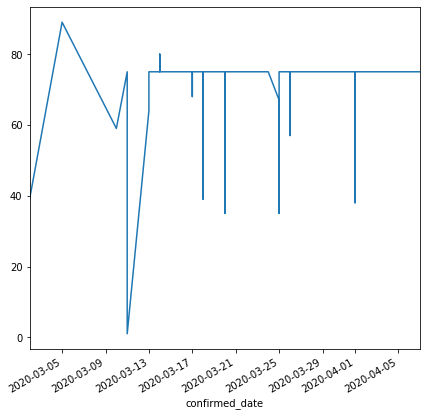

In [470]:
data['age'].plot(figsize=(7,7))
plt.show()

In [471]:
#time series
data['2020-03']
#donc il va connaitre la notion du time[jour semaine mois]

,sex,age,country,province,exposure_start,infection_reason,state
confirmed_date,,,,,,,
2020-03-02,male,39,Maroc,Casablanca - Settat,02/24 to 03/12,Imported,Exit
2020-03-05,female,89,Maroc,Casablanca - Settat,02/24 to 03/12,Imported,Deceased
2020-03-10,male,59,France,Marrakech - Safi,3/7/20,Imported,Exit
2020-03-11,female,75,France,Marrakech - Safi,3/7/20,Imported,Exit
2020-03-11,female,1,France,Marrakech - Safi,3/7/20,Imported,Exit
...,...,...,...,...,...,...,...
2020-03-31,female,75,Maroc,Beni Mellal - Khenifra,02/24 to 03/12,Local,isolated
2020-03-31,female,75,Maroc,Oriental,02/24 to 03/12,Local,isolated
2020-03-31,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated


In [472]:
data['2020-04']

,sex,age,country,province,exposure_start,infection_reason,state
confirmed_date,,,,,,,
2020-04-01,female,75,Maroc,Casablanca - Settat,02/24 to 03/12,Local,isolated
2020-04-01,female,75,Maroc,Casablanca - Settat,02/24 to 03/12,Local,isolated
2020-04-01,female,75,Maroc,Casablanca - Settat,02/24 to 03/12,Local,isolated
2020-04-01,female,75,Maroc,Casablanca - Settat,02/24 to 03/12,Local,isolated
2020-04-01,female,75,Maroc,Casablanca - Settat,02/24 to 03/12,Local,isolated
...,...,...,...,...,...,...,...
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated
2020-04-07,female,75,Maroc,Daraa - Tafilalet,02/24 to 03/12,Local,isolated


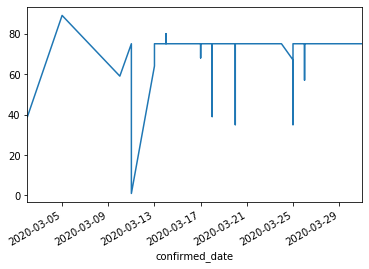

In [473]:
data['2020-03']['age'].plot()

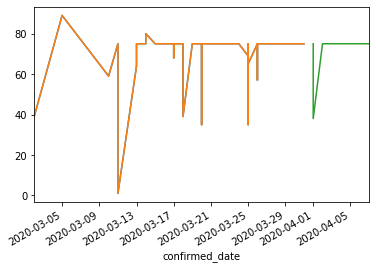

In [474]:
#### reasimple il nous permet de regouper nos donner par [annne mois.........seconde miliseconde.....]
data['2020']['age'].resample('M').plot()
plt.show()

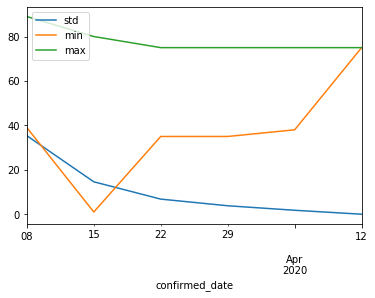

In [475]:
data['2020']['age'].resample('w').agg(['mean','std','min','max']).plot()


In [476]:
data['2020']['age'].resample('w').agg(['mean','std','min','max'])


,std,min,max
confirmed_date,,,
2020-03-08,35.355339,39.0,89.0
2020-03-15,14.592763,1.0,80.0
2020-03-22,6.798246,35.0,75.0
2020-03-29,3.803998,35.0,75.0
2020-04-05,1.772448,38.0,75.0
2020-04-12,0.000000,75.0,75.0


In [483]:
X=data.drop('state', axis=1)
y=data['state']
data.columns

Index(['sex', 'age', 'country', 'province', 'exposure_start',
       'infection_reason', 'state'],
      dtype='object')

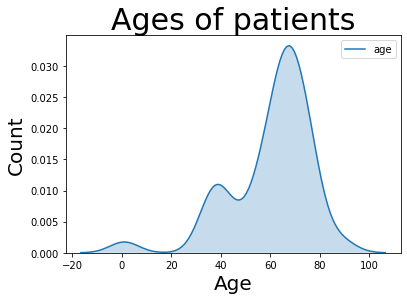

In [502]:
b = sns.kdeplot(df['age'], shade=True)
b.axes.set_title('Ages of patients', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

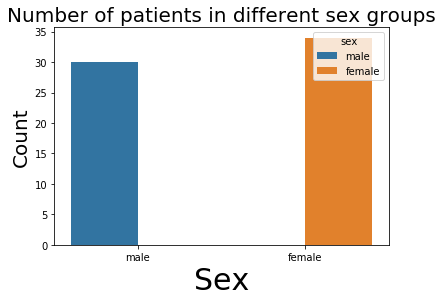

In [78]:
b = sns.countplot(x='sex', hue="sex", data=df)

b.axes.set_title('Number of patients in different sex groups',fontsize=20)
b.set_xlabel("Sex",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

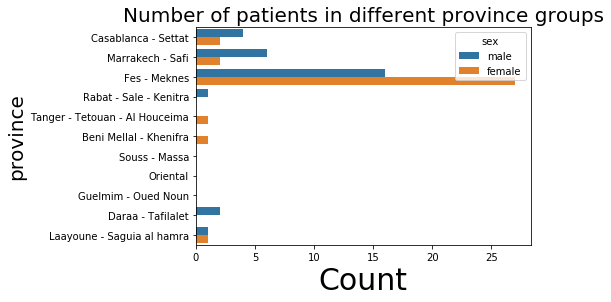

In [79]:
b = sns.countplot(y='province', hue="sex", data=df)

b.axes.set_title('Number of patients in different province groups',fontsize=20)
b.set_xlabel("Count",fontsize=30)
b.set_ylabel("province",fontsize=20)
plt.show()

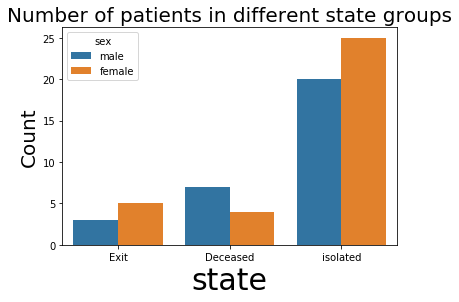

In [82]:
b = sns.countplot(x='state', hue="sex", data=df)

b.axes.set_title('Number of patients in different state groups',fontsize=20)
b.set_xlabel("state",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

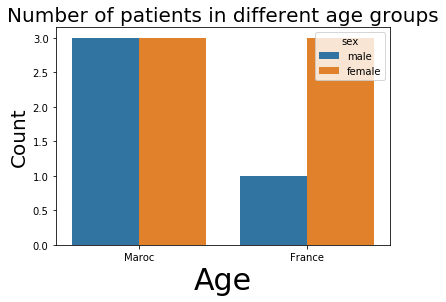

In [83]:
b = sns.countplot(x='country', hue="sex", data=df)

b.axes.set_title('Number of patients in different age groups',fontsize=20)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()